<a href="https://colab.research.google.com/github/AdityaPatidaroo7/Aditya-/blob/main/Text_summarizaton_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import string # special operations on strings
import spacy # language models

from matplotlib.pyplot import imread
from matplotlib import pyplot as plt
from wordcloud import WordCloud
%matplotlib inline

In [3]:
book=pd.read_excel("/content/Mindset_data_ch.csv",index_col=0)
book

,Text
index,
1,"When I was a young researcher, just starting o..."
2,"Since the dawn of time, people have thought di..."
3,Itâ€™s one thing to have pundits spouting thei...
4,Iâ€™ve seen so many people with this one consu...
5,To give you a better sense of how the two mind...
6,Is this such a novel idea? We have lots of say...
7,We often see books with titles like The Ten Se...
8,But it was those with the fixed mindset who ac...
9,1. Your intelligence is something very basic a...


In [4]:
#removing the leading and trailing characters
book= [text.strip() for text in book.Text]
#removing the empty strings
book = [text for text in book if text]

In [5]:
# Joining the list into one string/text
text = ' '.join(book)
text

'When I was a young researcher, just starting out, something happened that changed my life. I was obsessed with understanding how people cope with failures, and I decided to study it by watching how students grapple with hard problems. So I brought children one at a time to a room in their school, made them comfortable, and then gave them a series of puzzles to solve. The first ones were fairly easy, but the next ones were hard. As the students grunted, perspired, and toiled, I watched their strategies and probed what they were thinking and feeling. I expected differences among children in how they coped with the difficulty, but I saw something I never expected. Confronted with the hard puzzles, one ten-year-old boy pulled up his chair, rubbed his hands together, smacked his lips, and cried out, â€œI love a challenge!â€\x9d Another, sweating away on these puzzles, looked up with a pleased expression and said with authority, â€œYou know, I was hoping this would be informative!â€\x9d Wha

In [6]:

#Punctuation
no_punc_text = text.translate(str.maketrans('', '', string.punctuation)) #with arguments (x, y, z) where 'x' and 'y'
# must be equal-length strings and characters in 'x'
# are replaced by characters in 'y'. 'z'
# is a string (string.punctuation here)
no_punc_text

'When I was a young researcher just starting out something happened that changed my life I was obsessed with understanding how people cope with failures and I decided to study it by watching how students grapple with hard problems So I brought children one at a time to a room in their school made them comfortable and then gave them a series of puzzles to solve The first ones were fairly easy but the next ones were hard As the students grunted perspired and toiled I watched their strategies and probed what they were thinking and feeling I expected differences among children in how they coped with the difficulty but I saw something I never expected Confronted with the hard puzzles one tenyearold boy pulled up his chair rubbed his hands together smacked his lips and cried out â€œI love a challengeâ€\x9d Another sweating away on these puzzles looked up with a pleased expression and said with authority â€œYou know I was hoping this would be informativeâ€\x9d Whatâ€™s wrong with them I wonde

In [7]:

import nltk
nltk.download('punkt')
  

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [8]:
#Tokenization
from nltk.tokenize import word_tokenize
text_tokens = word_tokenize(no_punc_text)
print(text_tokens[0:50])

['When', 'I', 'was', 'a', 'young', 'researcher', 'just', 'starting', 'out', 'something', 'happened', 'that', 'changed', 'my', 'life', 'I', 'was', 'obsessed', 'with', 'understanding', 'how', 'people', 'cope', 'with', 'failures', 'and', 'I', 'decided', 'to', 'study', 'it', 'by', 'watching', 'how', 'students', 'grapple', 'with', 'hard', 'problems', 'So', 'I', 'brought', 'children', 'one', 'at', 'a', 'time', 'to', 'a', 'room']


In [9]:
len(text_tokens)

21922

In [10]:
#Remove stopwords
import nltk
from nltk.corpus import stopwords
nltk.download('punkt')
nltk.download('stopwords')

my_stop_words = stopwords.words('english')
my_stop_words.append('the')
no_stop_tokens = [word for word in text_tokens if not word in my_stop_words]
print(no_stop_tokens[0:40])

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
['When', 'I', 'young', 'researcher', 'starting', 'something', 'happened', 'changed', 'life', 'I', 'obsessed', 'understanding', 'people', 'cope', 'failures', 'I', 'decided', 'study', 'watching', 'students', 'grapple', 'hard', 'problems', 'So', 'I', 'brought', 'children', 'one', 'time', 'room', 'school', 'made', 'comfortable', 'gave', 'series', 'puzzles', 'solve', 'The', 'first', 'ones']


In [11]:
#Noramalize the data
lower_words = [x.lower() for x in no_stop_tokens]
print(lower_words[0:25])

['when', 'i', 'young', 'researcher', 'starting', 'something', 'happened', 'changed', 'life', 'i', 'obsessed', 'understanding', 'people', 'cope', 'failures', 'i', 'decided', 'study', 'watching', 'students', 'grapple', 'hard', 'problems', 'so', 'i']


In [12]:
#Stemming
from nltk.stem import PorterStemmer
ps = PorterStemmer()
stemmed_tokens = [ps.stem(word) for word in lower_words]
print(stemmed_tokens[0:40])

['when', 'i', 'young', 'research', 'start', 'someth', 'happen', 'chang', 'life', 'i', 'obsess', 'understand', 'peopl', 'cope', 'failur', 'i', 'decid', 'studi', 'watch', 'student', 'grappl', 'hard', 'problem', 'so', 'i', 'brought', 'children', 'one', 'time', 'room', 'school', 'made', 'comfort', 'gave', 'seri', 'puzzl', 'solv', 'the', 'first', 'one']


In [13]:
# NLP english language model of spacy library
nlp = spacy.load('en') 

In [14]:
# lemmas being one of them, but mostly POS, which will follow later
doc = nlp(' '.join(no_stop_tokens))
print(doc[0:40])

When I young researcher starting something happened changed life I obsessed understanding people cope failures I decided study watching students grapple hard problems So I brought children one time room school made comfortable gave series puzzles solve The first ones


In [15]:
lemmas = [token.lemma_ for token in doc]
print(lemmas[0:25])

['when', '-PRON-', 'young', 'researcher', 'start', 'something', 'happen', 'change', 'life', '-PRON-', 'obsess', 'understand', 'people', 'cope', 'failure', '-PRON-', 'decide', 'study', 'watch', 'student', 'grapple', 'hard', 'problem', 'so', '-PRON-']


Feature Extraction

In [16]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(lemmas)

In [17]:
print(vectorizer.vocabulary_)

{'when': 2891, 'pron': 2067, 'young': 2978, 'researcher': 2196, 'start': 2478, 'something': 2438, 'happen': 1205, 'change': 397, 'life': 1529, 'obsess': 1804, 'understand': 2786, 'people': 1905, 'cope': 551, 'failure': 970, 'decide': 639, 'study': 2528, 'watch': 2869, 'student': 2526, 'grapple': 1161, 'hard': 1208, 'problem': 2046, 'so': 2421, 'bring': 324, 'child': 418, 'one': 1820, 'time': 2683, 'room': 2239, 'school': 2275, 'make': 1596, 'comfortable': 483, 'give': 1134, 'series': 2327, 'puzzle': 2093, 'solve': 2429, 'the': 2638, 'first': 1030, 'fairly': 973, 'easy': 804, 'next': 1769, 'as': 165, 'grunt': 1181, 'perspire': 1928, 'toil': 2696, 'strategy': 2514, 'probe': 2045, 'think': 2654, 'feeling': 1003, 'expect': 942, 'difference': 702, 'among': 119, 'difficulty': 708, 'see': 2306, 'never': 1765, 'confront': 521, 'tenyearold': 2625, 'boy': 309, 'pull': 2085, 'chair': 390, 'rub': 2243, 'hand': 1197, 'together': 2695, 'smack': 2411, 'lip': 1542, 'cry': 597, 'œi': 3034, 'love': 1575

In [18]:
print(vectorizer.get_feature_names()[50:100])
print(X.toarray()[50:100])

['administer', 'admire', 'admission', 'admit', 'adolescence', 'adolescent', 'adopt', 'adorable', 'adoration', 'adorn', 'adult', 'advance', 'advanced', 'advantage', 'advice', 'advise', 'aesop', 'affect', 'affection', 'affirmation', 'afford', 'afraid', 'after', 'afterâ', 'again', 'againâ', 'age', 'agenda', 'agent', 'ago', 'agonizing', 'agree', 'agreement', 'ah', 'aha', 'ahead', 'aheadâ', 'ainâ', 'air', 'alarm', 'albert', 'alfred', 'algebra', 'algebraic', 'alien', 'all', 'allege', 'allout', 'allow', 'alltime']
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [19]:
print(X.toarray().shape)

(13589, 3099)


Let's see how can bigrams and trigrams can be included here

In [20]:
vectorizer_ngram_range = CountVectorizer(analyzer='word',ngram_range=(1,3),max_features = 100)
bow_matrix_ngram =vectorizer_ngram_range.fit_transform(book)

In [21]:
print(vectorizer_ngram_range.get_feature_names())
print(bow_matrix_ngram.toarray())

['ability', 'about', 'all', 'an', 'and', 'are', 'as', 'at', 'be', 'but', 'by', 'can', 'could', 'did', 'do', 'donâ', 'effort', 'fixed', 'fixed mindset', 'for', 'from', 'growth', 'growth mindset', 'had', 'have', 'he', 'her', 'his', 'how', 'if', 'in', 'in the', 'into', 'is', 'it', 'itâ', 'just', 'know', 'learning', 'like', 'me', 'mindset', 'more', 'my', 'no', 'not', 'of', 'of the', 'on', 'one', 'or', 'out', 'over', 'people', 'people with', 're', 'really', 'said', 'she', 'so', 'some', 'something', 'students', 'test', 'than', 'that', 'the', 'the fixed', 'the fixed mindset', 'the growth', 'the growth mindset', 'their', 'them', 'then', 'there', 'these', 'they', 'theyâ', 'think', 'this', 'time', 'to', 'to be', 'up', 'was', 'way', 'we', 'were', 'what', 'when', 'who', 'with', 'with the', 'with the fixed', 'work', 'would', 'you', 'your', 'youâ', 'youâ re']
[[0 0 0 ... 0 0 0]
 [0 2 1 ... 0 0 0]
 [0 2 0 ... 4 1 0]
 ...
 [7 1 3 ... 0 0 0]
 [3 2 3 ... 0 0 0]
 [3 1 4 ... 0 0 0]]


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


TFidf vectorizer

In [22]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer_n_gram_max_features = TfidfVectorizer(norm="l2",analyzer='word', ngram_range=(1,3), max_features = 500)
tf_idf_matrix_n_gram_max_features =vectorizer_n_gram_max_features.fit_transform(book)
print(vectorizer_n_gram_max_features.get_feature_names())
print(tf_idf_matrix_n_gram_max_features.toarray())

['abilities', 'ability', 'about', 'about the', 'achievement', 'after', 'again', 'age', 'agree', 'all', 'all the', 'already', 'also', 'always', 'am', 'an', 'and', 'and how', 'and it', 'and over', 'and the', 'and then', 'and they', 'another', 'any', 'anyone', 'are', 'are you', 'as', 'as they', 'as you', 'asked', 'at', 'at the', 'away', 'back', 'bad', 'be', 'because', 'become', 'been', 'before', 'being', 'belief', 'believe', 'believed', 'best', 'better', 'better than', 'big', 'book', 'born', 'both', 'brain', 'but', 'but not', 'but they', 'by', 'by the', 'came', 'can', 'can be', 'canâ', 'challenge', 'change', 'changed', 'child', 'children', 'choice', 'class', 'clear', 'college', 'confidence', 'could', 'couldnâ', 'course', 'day', 'develop', 'developed', 'did', 'did not', 'didnâ', 'different', 'do', 'do it', 'do you', 'does', 'doesnâ', 'doing', 'donâ', 'donâ have', 'down', 'each', 'early', 'easy', 'effort', 'effort is', 'english', 'enough', 'even', 'ever', 'every', 'everyone', 'everything', 

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


Generate wordcloud

In [23]:
# Import packages
import matplotlib.pyplot as plt
%matplotlib inline
from wordcloud import WordCloud, STOPWORDS
# Define a function to plot word cloud
def plot_cloud(wordcloud):
    # Set figure size
    plt.figure(figsize=(40, 30))
    # Display image
    plt.imshow(wordcloud) 
    # No axis details
    plt.axis("off");

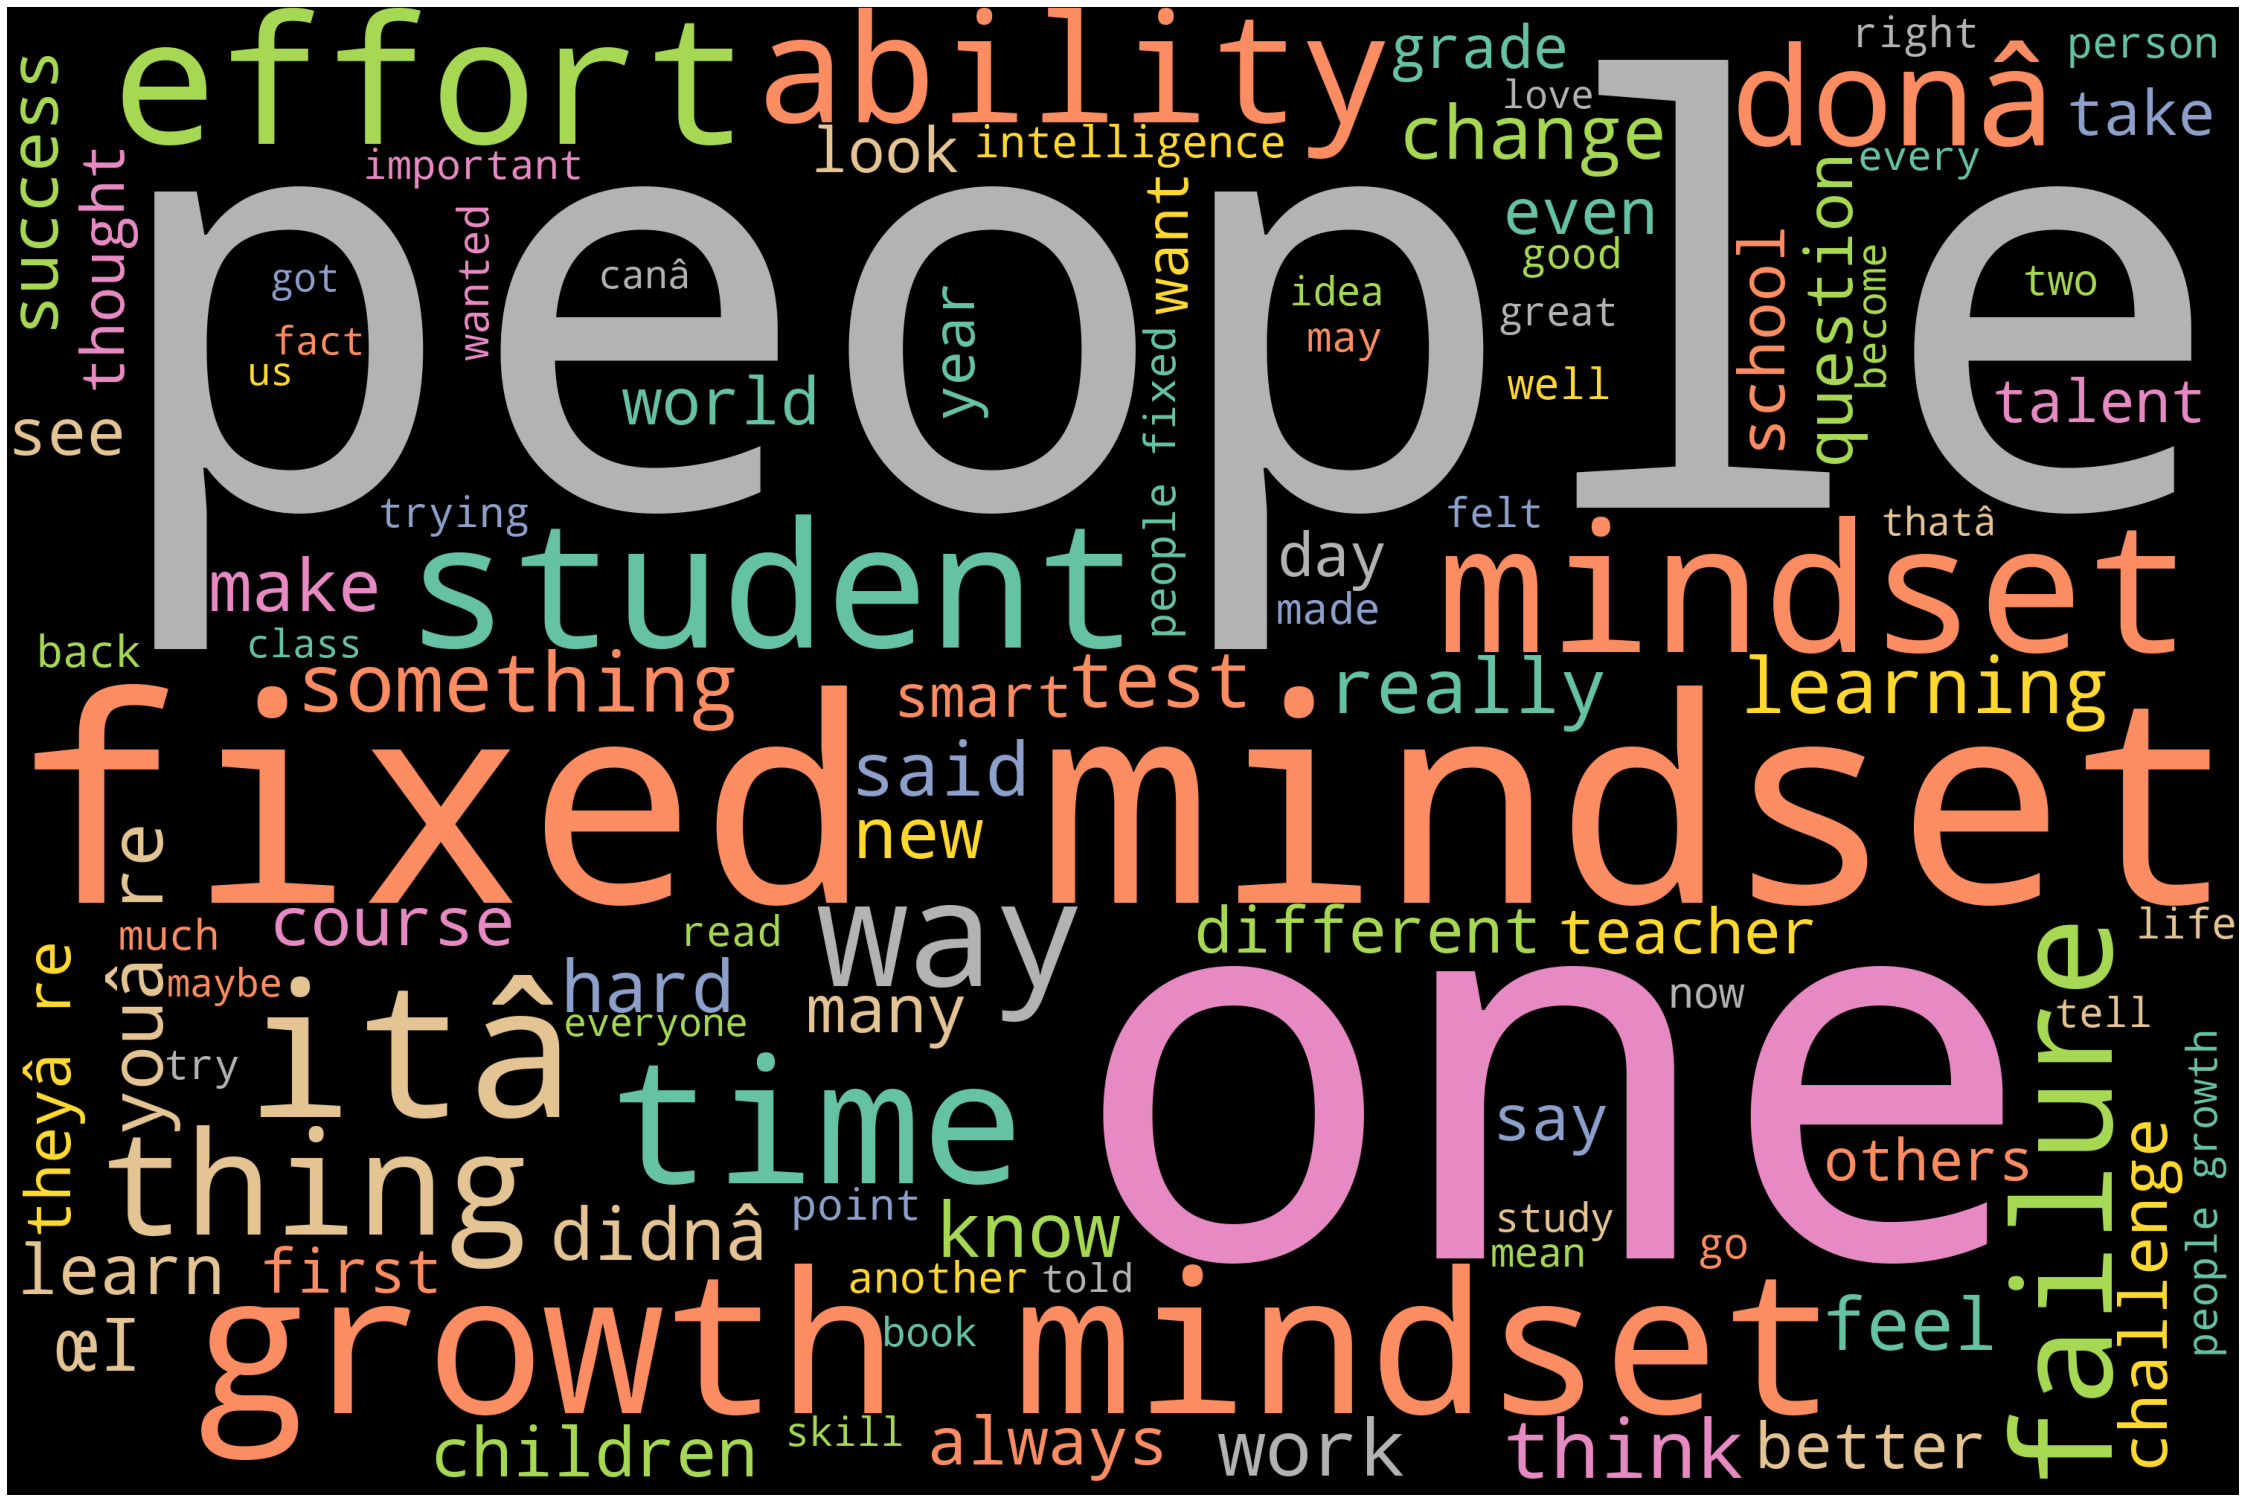

In [24]:
# Generate wordcloud
stopwords = STOPWORDS
stopwords.add('will')
wordcloud = WordCloud(width = 3000, height = 2000, background_color='black', max_words=100,colormap='Set2',stopwords=stopwords).generate(text)
# Plot
plot_cloud(wordcloud)

Sentence tokenize


```

```



In [25]:
from nltk.tokenize import sent_tokenize

sentences = sent_tokenize(text)

In [26]:
sentences

['When I was a young researcher, just starting out, something happened that changed my life.',
 'I was obsessed with understanding how people cope with failures, and I decided to study it by watching how students grapple with hard problems.',
 'So I brought children one at a time to a room in their school, made them comfortable, and then gave them a series of puzzles to solve.',
 'The first ones were fairly easy, but the next ones were hard.',
 'As the students grunted, perspired, and toiled, I watched their strategies and probed what they were thinking and feeling.',
 'I expected differences among children in how they coped with the difficulty, but I saw something I never expected.',
 'Confronted with the hard puzzles, one ten-year-old boy pulled up his chair, rubbed his hands together, smacked his lips, and cried out, â€œI love a challenge!â€\x9d Another, sweating away on these puzzles, looked up with a pleased expression and said with authority, â€œYou know, I was hoping this would 

In [27]:
sent_df = pd.DataFrame(sentences, columns=['sentence'])
sent_df

,sentence
0,"When I was a young researcher, just starting o..."
1,I was obsessed with understanding how people c...
2,So I brought children one at a time to a room ...
3,"The first ones were fairly easy, but the next ..."
4,"As the students grunted, perspired, and toiled..."
...,...
1467,"Several years ago, I was privileged to see a s..."
1468,I was stunned by the power and beauty of each ...
1469,Can anyone do anything?
1470,I donâ€™t really know.


**Named entity recognition** 

In [28]:
from spacy import displacy

In [29]:
#Named entity recognition for sentences between 10 to 20
ner = spacy.load('en_core_web_sm')

for i in range(10,20):
    one_sent = sentences[i]
    doc_block = ner(one_sent)
    displacy.render(doc_block, style='ent',  jupyter=True)  

/usr/lib/python3.7/runpy.py:193: UserWarning: [W006] No entities to visualize found in Doc object. If this is surprising to you, make sure the Doc was processed using a model that supports named entity recognition, and check the `doc.ents` property manually if necessary.
  "__main__", mod_spec)


/usr/lib/python3.7/runpy.py:193: UserWarning: [W006] No entities to visualize found in Doc object. If this is surprising to you, make sure the Doc was processed using a model that supports named entity recognition, and check the `doc.ents` property manually if necessary.
  "__main__", mod_spec)


/usr/lib/python3.7/runpy.py:193: UserWarning: [W006] No entities to visualize found in Doc object. If this is surprising to you, make sure the Doc was processed using a model that supports named entity recognition, and check the `doc.ents` property manually if necessary.
  "__main__", mod_spec)


/usr/lib/python3.7/runpy.py:193: UserWarning: [W006] No entities to visualize found in Doc object. If this is surprising to you, make sure the Doc was processed using a model that supports named entity recognition, and check the `doc.ents` property manually if necessary.
  "__main__", mod_spec)


/usr/lib/python3.7/runpy.py:193: UserWarning: [W006] No entities to visualize found in Doc object. If this is surprising to you, make sure the Doc was processed using a model that supports named entity recognition, and check the `doc.ents` property manually if necessary.
  "__main__", mod_spec)


/usr/lib/python3.7/runpy.py:193: UserWarning: [W006] No entities to visualize found in Doc object. If this is surprising to you, make sure the Doc was processed using a model that supports named entity recognition, and check the `doc.ents` property manually if necessary.
  "__main__", mod_spec)


/usr/lib/python3.7/runpy.py:193: UserWarning: [W006] No entities to visualize found in Doc object. If this is surprising to you, make sure the Doc was processed using a model that supports named entity recognition, and check the `doc.ents` property manually if necessary.
  "__main__", mod_spec)


/usr/lib/python3.7/runpy.py:193: UserWarning: [W006] No entities to visualize found in Doc object. If this is surprising to you, make sure the Doc was processed using a model that supports named entity recognition, and check the `doc.ents` property manually if necessary.
  "__main__", mod_spec)


In [30]:
Create the Frequency matrix of the words in each sentence.
[ ]


SyntaxError: ignored

**Create the Frequency matrix of the words in each sentence
**

In [31]:
def _create_frequency_matrix(sentences):
    frequency_matrix = {}
    stopWords = set(stopwords.words("english"))
    ps = PorterStemmer()

    for sent in sentences:
        freq_table = {}
        words = word_tokenize(sent)
        for word in words:
          
            word = word.lower()
            word = ps.stem(word)
            if word in stopWords:
                continue

            if word in freq_table:
                freq_table[word] += 1
            else:
                freq_table[word] = 1

        frequency_matrix[sent[:15]] = freq_table

    return frequency_matrix

In [32]:
freq_matrix = _create_frequency_matrix(sentences)

AttributeError: ignored

In [34]:
pip install sumy    


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 94 kB 2.0 MB/s 
     |████████████████████████████████| 10.1 MB 17.4 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
  Created wheel for breadability: filename=breadability-0.1.20-py2.py3-none-any.whl size=21712 sha256=da307e588c1c486bcca262794f204ace5ba83cf1e5debe4a9412025e9146e0a4
  Stored in directory: /root/.cache/pip/wheels/d4/bf/51/81d27ad638e1a6dca4f362ecc33d1e2c764b8ea7ec751b8fc1
  Created wheel for pycountry: filename=pycountry-22.3.5-py2.py3-none-any.whl size=10681845 sha256=979b56bc517d5d9d2097cb46b69d7e7f7a420f68569e332feed887ce762da34e
  Stored in directory: /root/.cache/pip/wheels/0e/06/e8/7ee176e95ea9a8a8c3b3afcb1869f20adbd42413d4611c6eb4
Successfully built breadability pycountry


In [35]:
!pip install gensim

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [52]:
# from nltk
import nltk
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [45]:

#from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from nltk.tokenize import sent_tokenize, word_tokenize
from string import punctuation
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.util import ngrams
from wordcloud import WordCloud, STOPWORDS
import math
from sumy.nlp.stemmers import Stemmer
from sumy.parsers.plaintext import PlaintextParser
from sumy.nlp.tokenizers import Tokenizer

from sumy.summarizers.luhn import LuhnSummarizer
from sumy.summarizers.lsa import LsaSummarizer
from sumy.summarizers.edmundson import EdmundsonSummarizer
from sumy.summarizers.kl import KLSummarizer
from sumy.summarizers.reduction import ReductionSummarizer
from sumy.summarizers.text_rank import TextRankSummarizer
from sumy.summarizers.lex_rank import LexRankSummarizer
from nltk.corpus import stopwords
from gensim.summarization.summarizer import summarize
from gensim.summarization import keywords
import nltk.translate.bleu_score as bleu


In [37]:
language = "english"
sentence_count = 5
 
parser = PlaintextParser(book, Tokenizer(language))


In [47]:
hyp = str(text).split()
hyp

['When',
 'I',
 'was',
 'a',
 'young',
 'researcher,',
 'just',
 'starting',
 'out,',
 'something',
 'happened',
 'that',
 'changed',
 'my',
 'life.',
 'I',
 'was',
 'obsessed',
 'with',
 'understanding',
 'how',
 'people',
 'cope',
 'with',
 'failures,',
 'and',
 'I',
 'decided',
 'to',
 'study',
 'it',
 'by',
 'watching',
 'how',
 'students',
 'grapple',
 'with',
 'hard',
 'problems.',
 'So',
 'I',
 'brought',
 'children',
 'one',
 'at',
 'a',
 'time',
 'to',
 'a',
 'room',
 'in',
 'their',
 'school,',
 'made',
 'them',
 'comfortable,',
 'and',
 'then',
 'gave',
 'them',
 'a',
 'series',
 'of',
 'puzzles',
 'to',
 'solve.',
 'The',
 'first',
 'ones',
 'were',
 'fairly',
 'easy,',
 'but',
 'the',
 'next',
 'ones',
 'were',
 'hard.',
 'As',
 'the',
 'students',
 'grunted,',
 'perspired,',
 'and',
 'toiled,',
 'I',
 'watched',
 'their',
 'strategies',
 'and',
 'probed',
 'what',
 'they',
 'were',
 'thinking',
 'and',
 'feeling.',
 'I',
 'expected',
 'differences',
 'among',
 'children',

In [43]:
summarize_1 = LuhnSummarizer(Stemmer(language)) #LuhnSummarizer Model
summarize_1.stop_words
summary_1=summarize_1(parser.document, sentence_count)
for sentence_luhn in summary_1:
    print(sentence_luhn)

Instead, as you begin to understand the fixed and growth mindsets, you will see exactly how one thing leads to anotherâ€”how a belief that your qualities are carved in stone leads to a host of thoughts and actions, and how a belief that your qualities can be cultivated leads to a host of different thoughts and actions, taking you down an entirely different road.
I felt I had discovered the secret of the universe!â€\x9d They feel their mindsets reorienting: â€œI can certainly report a kind of personal revolution happening in my own thinking, and this is an exciting feeling.â€\x9d And they can put this new thinking into practice for themselves and others: â€œYour work has allowed me to transform my work with children and see education through a different lens,â€\x9d or â€œI just wanted to let you know what an impactâ€”on a personal and practical levelâ€”your outstanding research has had for hundreds of students.â€\x9d I get lots of these letters from coaches and business leaders, too.
We

In [48]:
ref_luhn= str(sentence_luhn).split()
score_luhn = bleu.sentence_bleu([ref_luhn], hyp)
print("Hyp and luhn are the same: {}".format(score_luhn))

Hyp and luhn are the same: 0.0027526419847181296


In [53]:
summarize_4 = EdmundsonSummarizer(Stemmer(language)) #EdmunsonSummarizer
 
summarize_4.bonus_words = text.split()
summarize_4.stigma_words = ['zdfgthdvndadv']
summarize_4.null_words = stop_words
summary_4 = summarize_4(parser.document, sentence_count)
for sentence_edmn in summary_4:
    print(sentence_edmn)

Instead, as you begin to understand the fixed and growth mindsets, you will see exactly how one thing leads to anotherâ€”how a belief that your qualities are carved in stone leads to a host of thoughts and actions, and how a belief that your qualities can be cultivated leads to a host of different thoughts and actions, taking you down an entirely different road.
I felt I had discovered the secret of the universe!â€\x9d They feel their mindsets reorienting: â€œI can certainly report a kind of personal revolution happening in my own thinking, and this is an exciting feeling.â€\x9d And they can put this new thinking into practice for themselves and others: â€œYour work has allowed me to transform my work with children and see education through a different lens,â€\x9d or â€œI just wanted to let you know what an impactâ€”on a personal and practical levelâ€”your outstanding research has had for hundreds of students.â€\x9d I get lots of these letters from coaches and business leaders, too.
We

In [54]:
ref_edmn= str(sentence_edmn).split()
score_edmn = bleu.sentence_bleu([ref_edmn], hyp)
print("Hyp and edmn are the same: {}".format(score_edmn))

Hyp and edmn are the same: 0.0034239371251830178


In [55]:
# Summarization by ratio
summary_by_ratio=summarize(text,ratio=0.1)
print(summary_by_ratio)

I was obsessed with understanding how people cope with failures, and I decided to study it by watching how students grapple with hard problems.
Confronted with the hard puzzles, one ten-year-old boy pulled up his chair, rubbed his hands together, smacked his lips, and cried out, â€œI love a challenge!â€ Another, sweating away on these puzzles, looked up with a pleased expression and said with authority, â€œYou know, I was hoping this would be informative!â€ Whatâ€™s wrong with them?
They obviously knew something I didnâ€™t and I was determined to figure it outâ€”to understand the kind of mindset that could turn a failure into a gift.
Even as a child, I was focused on being smart, but the fixed mindset was really stamped in by Mrs. Wilson, my sixth-grade teacher.
This growth mindset is based on the belief that your basic qualities are things you can cultivate through your efforts, your strategies, and help from others.
To give you a better sense of how the two mindsets work, imagineâ€

In [63]:
ref_ratio= str(summary_by_ratio).split()
score_ratio = bleu.sentence_bleu([ref_ratio], hyp)
print("Hyp and gen_ratio are the same: {}".format(score_ratio))

Hyp and gen_ratio are the same: 0.159156656595843


In [57]:
summarizer_lsa = LsaSummarizer()

# Summarize using sumy LSA
summary =summarizer_lsa(parser.document,2)

lsa_summary=""
for sentence in text:
    lsa_summary+=str(sentence)

print(lsa_summary)

When I was a young researcher, just starting out, something happened that changed my life. I was obsessed with understanding how people cope with failures, and I decided to study it by watching how students grapple with hard problems. So I brought children one at a time to a room in their school, made them comfortable, and then gave them a series of puzzles to solve. The first ones were fairly easy, but the next ones were hard. As the students grunted, perspired, and toiled, I watched their strategies and probed what they were thinking and feeling. I expected differences among children in how they coped with the difficulty, but I saw something I never expected. Confronted with the hard puzzles, one ten-year-old boy pulled up his chair, rubbed his hands together, smacked his lips, and cried out, â€œI love a challenge!â€ Another, sweating away on these puzzles, looked up with a pleased expression and said with authority, â€œYou know, I was hoping this would be informative!â€ Whatâ€™s w

In [58]:
ref_lsa= str(lsa_summary).split()
score_lsa = bleu.sentence_bleu([ref_lsa], hyp)
print("Hyp and lsa are the same: {}".format(score_lsa))

Hyp and lsa are the same: 1.0


In [59]:
summarizer_kl = KLSummarizer()

# Summarize using sumy KL Divergence
summary =summarizer_kl(parser.document,2)

kl_summary=""
for sentence in text:
    kl_summary+=str(sentence)  
print(kl_summary)

When I was a young researcher, just starting out, something happened that changed my life. I was obsessed with understanding how people cope with failures, and I decided to study it by watching how students grapple with hard problems. So I brought children one at a time to a room in their school, made them comfortable, and then gave them a series of puzzles to solve. The first ones were fairly easy, but the next ones were hard. As the students grunted, perspired, and toiled, I watched their strategies and probed what they were thinking and feeling. I expected differences among children in how they coped with the difficulty, but I saw something I never expected. Confronted with the hard puzzles, one ten-year-old boy pulled up his chair, rubbed his hands together, smacked his lips, and cried out, â€œI love a challenge!â€ Another, sweating away on these puzzles, looked up with a pleased expression and said with authority, â€œYou know, I was hoping this would be informative!â€ Whatâ€™s w

In [60]:
ref_kl= str(kl_summary).split()
score_kl = bleu.sentence_bleu([ref_kl], hyp)
print("Hyp and kl are the same: {}".format(score_kl))

Hyp and kl are the same: 1.0


In [61]:
summarizer_lsa = LsaSummarizer()

# Summarize using sumy LSA
summary =summarizer_lsa(parser.document,2)

lsa_summary=""
for sentence in text:
    lsa_summary+=str(sentence)

print(lsa_summary)

When I was a young researcher, just starting out, something happened that changed my life. I was obsessed with understanding how people cope with failures, and I decided to study it by watching how students grapple with hard problems. So I brought children one at a time to a room in their school, made them comfortable, and then gave them a series of puzzles to solve. The first ones were fairly easy, but the next ones were hard. As the students grunted, perspired, and toiled, I watched their strategies and probed what they were thinking and feeling. I expected differences among children in how they coped with the difficulty, but I saw something I never expected. Confronted with the hard puzzles, one ten-year-old boy pulled up his chair, rubbed his hands together, smacked his lips, and cried out, â€œI love a challenge!â€ Another, sweating away on these puzzles, looked up with a pleased expression and said with authority, â€œYou know, I was hoping this would be informative!â€ Whatâ€™s w

In [62]:
ref_lsa= str(lsa_summary).split()
score_lsa = bleu.sentence_bleu([ref_lsa], hyp)
print("Hyp and lsa are the same: {}".format(score_lsa))

Hyp and lsa are the same: 1.0


In [64]:
data = {'Model':['LuhnSummarizer','EdmundsonSummarizer','KLSummarizer', 'LsaSummarizer','Ratio summarization'],'Accuracy':[ score_luhn,score_edmn,score_kl,score_lsa,score_ratio]}

In [68]:
data_summary = pd.DataFrame(data_1)
data_summary


,Model,Summary
0,LuhnSummarizer,They believed that students entering their cla...
1,EdmundsonSummarizer,"Bloom concludes, â€œAfter forty years of inten..."
2,KLSummarizer,"When I was a young researcher, just starting o..."
3,LsaSummarizer,"When I was a young researcher, just starting o..."
4,Ratio summuriser,I was obsessed with understanding how people c...


In [66]:
data_1 = {'Model':['LuhnSummarizer','EdmundsonSummarizer','KLSummarizer', 'LsaSummarizer','Ratio summuriser'],'Summary':[sentence_luhn,sentence_edmn,kl_summary,lsa_summary,summary_by_ratio]}

In [67]:
data_model = pd.DataFrame(data)
data_model.sort_values(by=['Accuracy'], ascending=False)

,Model,Accuracy
2,KLSummarizer,1.000000
3,LsaSummarizer,1.000000
4,Ratio summarization,0.159157
1,EdmundsonSummarizer,0.003424
0,LuhnSummarizer,0.002753
